In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
!pip install livelossplot
from livelossplot import PlotLossesKerasTF
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
uploaded = files.upload()

Saving DataSet1_Q to DataSet1_Q
Saving DataSet2_Q to DataSet2_Q


In [ ]:
tr = pd.read_pickle("DataSet1_Q")
tr

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),Throttle 1,Throttle 2,Course (deg),Wind Direction (deg),Wind Speed (kt),Flap (deg),Landing Gear,Speed Break,Zero Fuel Weight (lbs),Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,37264.0,36208.0,79.720,79.720,263.0,-97.0,10.63,15.0,1.0,0.0,507200.0,107100.0,1006.00,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1.124502e+06
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,37184.0,36192.0,79.720,79.720,263.0,-96.0,9.50,15.0,1.0,0.0,507200.0,107050.0,1006.00,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1.196749e+06
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,37168.0,36128.0,79.720,79.720,263.0,-94.0,9.00,15.0,1.0,0.0,507200.0,107000.0,1006.00,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1.226738e+06
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,37184.0,36144.0,79.720,79.720,263.0,-95.0,11.38,15.0,1.0,0.0,507200.0,106950.0,1006.00,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1.023915e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348539,81.0,55.0,146.63,142.0,0.2190,21.13,237908.167479,237.0,5776.0,5776.0,33.530,34.060,57.0,7.0,8.50,30.0,1.0,39.0,501760.0,11600.0,1020.75,-1.5,-10.0,0.5,75.293718,-0.749189,-0.040481,346358.712722,7.367388e+04
348540,73.0,56.0,146.00,140.0,0.2180,21.38,237906.790959,237.0,5312.0,5376.0,28.235,29.400,57.0,31.0,8.00,30.0,1.0,60.0,501760.0,11600.0,1020.50,-2.0,-6.0,1.5,74.981756,-1.117373,-0.024390,345646.075969,2.291218e+04
348541,69.0,58.0,143.38,138.0,0.2125,21.13,237905.497094,237.0,4992.0,5040.0,23.620,25.580,57.0,75.0,6.50,30.0,1.0,60.0,501760.0,11600.0,1020.25,-3.5,-4.0,2.0,73.058973,-2.688120,-0.016688,342660.301901,-3.357920e+05
348542,65.0,60.0,137.13,133.0,0.2025,21.00,237904.281851,237.0,4704.0,4704.0,23.950,25.250,58.0,103.0,6.88,30.0,1.0,60.0,501760.0,11600.0,1020.00,-5.0,-4.0,0.5,69.605516,-2.234745,-0.017516,342138.307954,-2.303824e+05


In [1]:
tr["FF"] = tr["FF1 (lb/hr)"] + tr["FF2 (lb/hr)"]
tr['Throttle'] = tr['Throttle 2'] + tr['Throttle 1']
tr["Horizontal Force"] = tr['Thrust (N)'] + tr['Drag (N)']
keys = ["Ground Speed Dot (kt/s2)","Mass (kg)","FF",'Throttle',"Horizontal Force"]
data = tr[keys]
sns.pairplot(data=data,hue="FF");

NameError: ignored

In [ ]:
data.keys()

Index(['Ground Speed Dot (kt/s2)', 'Mass (kg)', 'FF', 'Throttle',
       'Horizontal Force'],
      dtype='object')

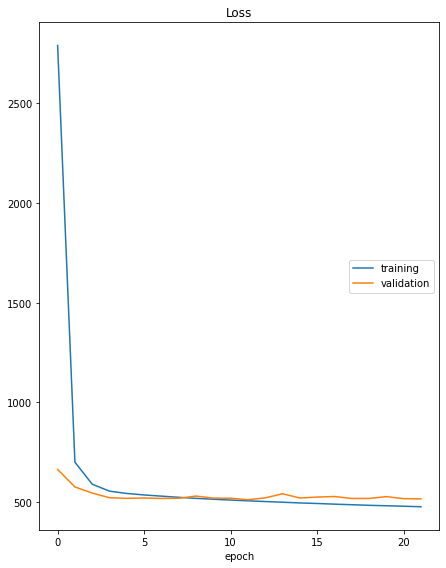

Loss
	training         	 (min:  476.073, max: 2790.926, cur:  476.073)
	validation       	 (min:  511.302, max:  663.264, cur:  515.548)

Epoch 00022: val_loss did not improve from 511.30219
4357/4357 [==============================] - 10s 2ms/step - loss: 476.0732 - val_loss: 515.5484 - lr: 0.0010


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np 

X = data.drop(columns=["FF"])
y = data["FF"]


data_normalizer = tf.keras.layers.Normalization(axis=-1)
data_normalizer.adapt(np.array(X))

checkpoint = ModelCheckpoint("best_model.hdf5", monitor="val_loss", verbose=1, save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, min_lr=0.00001)

early_stop = EarlyStopping(monitor="val_loss", patience=10)

model_5 = tf.keras.Sequential([
          data_normalizer,

          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          
          layers.Dense(1)
])

model_5.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

model_5_hist = model_5.fit(X, y, epochs=100, validation_split=.2,
                           callbacks=[PlotLossesKerasTF(), checkpoint, reduce_lr, early_stop],
                           batch_size=64)

11731/11731 - 11s - loss: 831.3856 - 11s/epoch - 949us/step
Test loss: 831.3856201171875


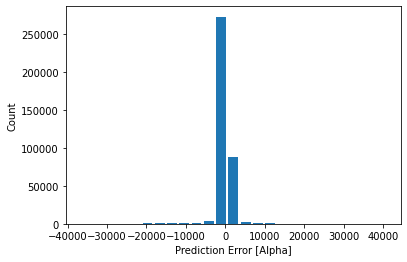

In [ ]:
tr1 = pd.read_pickle("DataSet2_Q")
tr1["FF"] = tr1["FF1 (lb/hr)"] + tr1["FF2 (lb/hr)"]
tr1['Throttle'] = tr1['Throttle 2'] + tr1['Throttle 1']
tr1["Horizontal Force"] = tr['Thrust (N)'] + tr1['Drag (N)']
keys = ["Ground Speed Dot (kt/s2)","Mass (kg)","FF",'Throttle',"Horizontal Force"]
data1 = tr1[keys]
data1=data1.fillna(value=-1)
X_test = data1.drop(columns=["FF"])
y_test = data1["FF"]


test_loss = model_5.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_loss)

test_predictions = model_5.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins=25, rwidth=.8);
plt.xlabel('Prediction Error [Alpha]')
_ = plt.ylabel('Count')

In [ ]:
X_test

,Ground Speed Dot (kt/s2),Mass (kg),Throttle,Horizontal Force
0,0.0,0.000000,0.00,0.000000e+00
1,3.0,325554.611609,150.51,1.609785e+06
2,3.5,325546.449257,150.51,1.656935e+06
3,4.0,325538.294968,150.51,1.669681e+06
4,3.5,325530.138664,150.55,1.466839e+06
...,...,...,...,...
375374,-1.0,208627.567788,67.72,-1.000000e+00
375375,-1.5,208626.269387,67.72,-1.000000e+00
375376,-1.5,208625.057671,64.47,-1.000000e+00
375377,-2.5,208623.942722,48.98,-1.000000e+00


### İkinci Aşama

In [ ]:
tr["FF"] = tr["FF1 (lb/hr)"] + tr["FF2 (lb/hr)"]
tr['Throttle'] = tr['Throttle 2'] + tr['Throttle 1']
tr["Horizontal Force"] = tr['Thrust (N)'] + tr['Drag (N)']
keys = ["Ground Speed Dot (kt/s2)","Mass (kg)","FF",'Throttle',"Horizontal Force","Altitude (ft)"]
data = tr[keys]
tr1 = pd.read_pickle("DataSet2_Q")
tr1["FF"] = tr1["FF1 (lb/hr)"] + tr1["FF2 (lb/hr)"]
tr1['Throttle'] = tr1['Throttle 2'] + tr1['Throttle 1']
tr1["Horizontal Force"] = tr['Thrust (N)'] + tr1['Drag (N)']
keys1 = ["Ground Speed Dot (kt/s2)","Mass (kg)","FF",'Throttle',"Horizontal Force","Altitude (ft)"]
data1 = tr1[keys1]

In [ ]:
def flight_pahse(data):
  j=0
  for i in range(len(data['Altitude (ft)'])-1):
    n = int(data["Altitude (ft)"][j])
    n_1 = int(data["Altitude (ft)"][j+1])
    if n == n_1:
      data["Altitude (ft)"][j] = "seyir"
    if n > n_1:
      data["Altitude (ft)"][j] = "alcalma"
    if n < n_1:
      data["Altitude (ft)"][j] = "tırmanis"

    j = j+1
    
flight_pahse(data)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1009: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-pac

In [ ]:
data["Altitude (ft)"] [348543] = "alcalma"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(data['Altitude (ft)'].astype("category").cat.categories)
data['Altitude (ft)'] = data['Altitude (ft)'].astype("category").cat.codes

Index(['alcalma', 'seyir', 'tırmanis'], dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
situation = data.set_index("Altitude (ft)")

In [ ]:
alcalma = situation.loc[0]

In [ ]:
seyir = situation.loc[1]

In [ ]:
tirmanis = situation.loc[2]

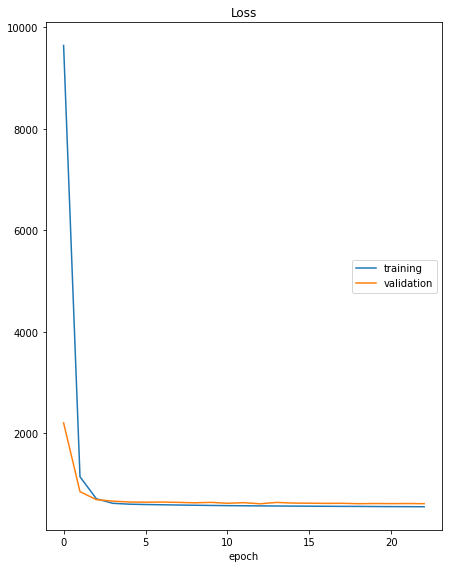

Loss
	training         	 (min:  552.190, max: 9643.449, cur:  552.190)
	validation       	 (min:  610.449, max: 2205.097, cur:  612.491)

Epoch 00023: val_loss did not improve from 610.44928
708/708 [==============================] - 2s 3ms/step - loss: 552.1905 - val_loss: 612.4910 - lr: 0.0010


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np 

X = alcalma.drop(columns=["FF"])
y = alcalma["FF"]


alcalma_normalizer = tf.keras.layers.Normalization(axis=-1)
alcalma_normalizer.adapt(np.array(X))

checkpoint = ModelCheckpoint("best_model.hdf5", monitor="val_loss", verbose=1, save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, min_lr=0.00001)

early_stop = EarlyStopping(monitor="val_loss", patience=10)

model_alcalma = tf.keras.Sequential([
          alcalma_normalizer,

          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          
          layers.Dense(1)
])

model_alcalma.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

model_alcalma_hist = model_alcalma.fit(X, y, epochs=100, validation_split=.2,
                           callbacks=[PlotLossesKerasTF(), checkpoint, reduce_lr, early_stop],
                           batch_size=64)

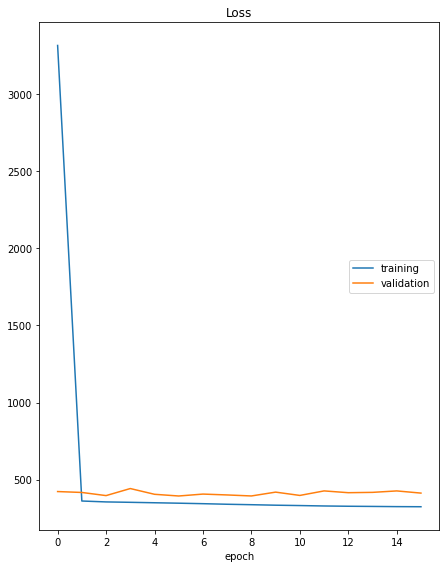

Loss
	training         	 (min:  323.966, max: 3316.016, cur:  323.966)
	validation       	 (min:  393.638, max:  441.969, cur:  412.425)

Epoch 00016: val_loss did not improve from 393.63751
2989/2989 [==============================] - 8s 3ms/step - loss: 323.9655 - val_loss: 412.4250 - lr: 0.0010


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np 

X = seyir.drop(columns=["FF"])
y = seyir["FF"]


seyir_normalizer = tf.keras.layers.Normalization(axis=-1)
seyir_normalizer.adapt(np.array(X))

checkpoint = ModelCheckpoint("best_model.hdf5", monitor="val_loss", verbose=1, save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, min_lr=0.00001)

early_stop = EarlyStopping(monitor="val_loss", patience=10)

model_seyir = tf.keras.Sequential([
          seyir_normalizer,

          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          
          layers.Dense(1)
])

model_seyir.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

model_seyir_hist = model_seyir.fit(X, y, epochs=100, validation_split=.2,
                           callbacks=[PlotLossesKerasTF(), checkpoint, reduce_lr, early_stop],
                           batch_size=64)

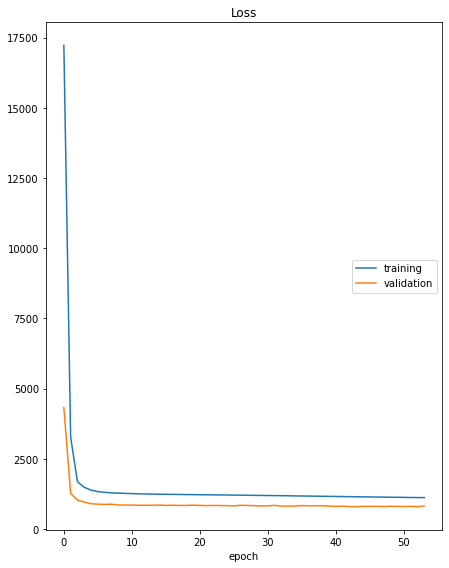

Loss
	training         	 (min: 1116.099, max: 17222.004, cur: 1116.099)
	validation       	 (min:  791.161, max: 4319.654, cur:  822.226)

Epoch 00054: val_loss did not improve from 791.16138
661/661 [==============================] - 2s 3ms/step - loss: 1116.0990 - val_loss: 822.2260 - lr: 0.0010


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np 

X = tirmanis.drop(columns=["FF"])
y = tirmanis["FF"]


tirmanis_normalizer = tf.keras.layers.Normalization(axis=-1)
tirmanis_normalizer.adapt(np.array(X))

checkpoint = ModelCheckpoint("best_model.hdf5", monitor="val_loss", verbose=1, save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=10, min_lr=0.00001)

early_stop = EarlyStopping(monitor="val_loss", patience=10)

model_tirmanis = tf.keras.Sequential([
          tirmanis_normalizer,

          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
          
          layers.Dense(1)
])

model_tirmanis.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

model_tirmanis_hist = model_tirmanis.fit(X, y, epochs=100, validation_split=.2,
                           callbacks=[PlotLossesKerasTF(), checkpoint, reduce_lr, early_stop],
                           batch_size=64)

In [ ]:
flight_pahse(data1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1009: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/

In [ ]:
data1

,Ground Speed Dot (kt/s2),Mass (kg),FF,Throttle,Horizontal Force,Altitude (ft)
0,0.0,0.000000,0.0,0.00,0.000000e+00,tırmanis
1,3.0,325554.611609,64528.0,150.51,1.609785e+06,seyir
2,3.5,325546.449257,64544.0,150.51,1.656935e+06,seyir
3,4.0,325538.294968,64480.0,150.51,1.669681e+06,seyir
4,3.5,325530.138664,64496.0,150.55,1.466839e+06,seyir
...,...,...,...,...,...,...
375374,-1.0,208627.567788,10896.0,67.72,NaN,alcalma
375375,-1.5,208626.269387,10064.0,67.72,NaN,alcalma
375376,-1.5,208625.057671,9376.0,64.47,NaN,alcalma
375377,-2.5,208623.942722,8608.0,48.98,NaN,seyir


In [ ]:
data1["Altitude (ft)"][375378] = "seyir"
data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Ground Speed Dot (kt/s2),Mass (kg),FF,Throttle,Horizontal Force,Altitude (ft)
0,0.0,0.000000,0.0,0.00,0.000000e+00,tırmanis
1,3.0,325554.611609,64528.0,150.51,1.609785e+06,seyir
2,3.5,325546.449257,64544.0,150.51,1.656935e+06,seyir
3,4.0,325538.294968,64480.0,150.51,1.669681e+06,seyir
4,3.5,325530.138664,64496.0,150.55,1.466839e+06,seyir
...,...,...,...,...,...,...
375374,-1.0,208627.567788,10896.0,67.72,NaN,alcalma
375375,-1.5,208626.269387,10064.0,67.72,NaN,alcalma
375376,-1.5,208625.057671,9376.0,64.47,NaN,alcalma
375377,-2.5,208623.942722,8608.0,48.98,NaN,seyir


In [ ]:
data1=data1.fillna(value=-1)
data1['Altitude (ft)'] = data1['Altitude (ft)'].astype("category").cat.codes
situation1 = data1.set_index("Altitude (ft)")
alcalma1 = situation1.loc[0]
seyir1 = situation1.loc[1]
tirmanis1 = situation1.loc[2]

8347/8347 - 8s - loss: 401.2809 - 8s/epoch - 998us/step
Test loss: 401.2808532714844


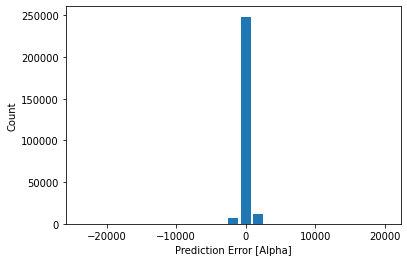

In [ ]:
X_test = seyir1.drop(columns=["FF"])
y_test = seyir1["FF"]


test_loss = model_seyir.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_loss)

test_predictions = model_seyir.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins=25, rwidth=.8);
plt.xlabel('Prediction Error [Alpha]')
_ = plt.ylabel('Count')

1738/1738 - 2s - loss: 743.9421 - 2s/epoch - 1ms/step
Test loss: 743.9420776367188


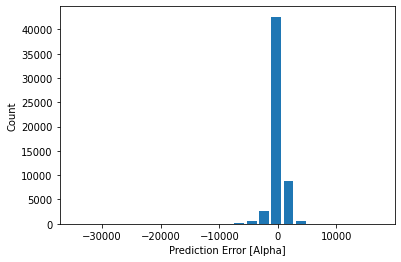

In [ ]:
X_test = alcalma1.drop(columns=["FF"])
y_test = alcalma1["FF"]


test_loss = model_alcalma.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_loss)

test_predictions = model_alcalma.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins=25, rwidth=.8);
plt.xlabel('Prediction Error [Alpha]')
_ = plt.ylabel('Count')

1647/1647 - 2s - loss: 2675.1477 - 2s/epoch - 1ms/step
Test loss: 2675.147705078125


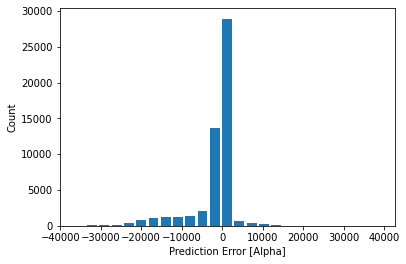

In [ ]:
X_test = tirmanis1.drop(columns=["FF"])
y_test = tirmanis1["FF"]


test_loss = model_tirmanis.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_loss)

test_predictions = model_tirmanis.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins=25, rwidth=.8);
plt.xlabel('Prediction Error [Alpha]')
_ = plt.ylabel('Count')